In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path: performance.ipynb
# Read in the data
trip_data = pd.read_csv('performance_data.csv')

In [24]:
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,anomaly_score,behaviour,cluster
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,8.240000,Digana-Kandy,1,normal,2
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,1.883333,Kandy-Digana,1,normal,2
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,8.250000,Digana-Kandy,1,normal,2
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,2.033333,Kandy-Digana,1,normal,2
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,9.456667,Digana-Kandy,1,normal,2


In [25]:
def calculate_excess_travel_time(df, column_name):
    p90 = np.percentile(df[column_name], 80)
    p10 = np.percentile(df[column_name], 20)

    df['excess_travel_time'] = df[column_name].apply(lambda time: time - p90 if time > p90 else time - p10 if time < p10 else 0)

    return df
trip_data = calculate_excess_travel_time(trip_data, 'travel_time')
trip_data.head()


,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,anomaly_score,behaviour,cluster
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,0.000000,Digana-Kandy,1,normal,2
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,2.030000,Kandy-Digana,1,normal,2
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,8.396667,Digana-Kandy,1,normal,2
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,2.180000,Kandy-Digana,1,normal,2
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,0.000000,Digana-Kandy,1,normal,2


# Average Travel Time by Hour of the Day and Weekend Status

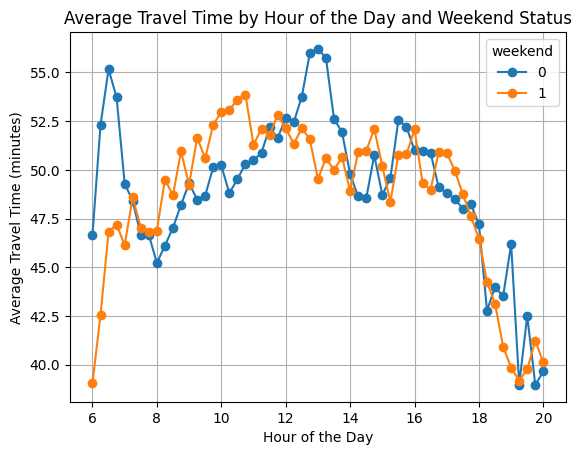

In [26]:
# Example: Creating a line chart for average travel time by hour of the day and weekend status
hourly_avg = trip_data.groupby(['hour_of_day', 'weekend'])['travel_time'].mean()
hourly_avg.unstack().plot(kind='line', marker='o')
plt.title('Average Travel Time by Hour of the Day and Weekend Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Travel Time (minutes)')
plt.grid()
plt.show()

In [27]:
# excess travel time positive and negative count
excess_travel_time = trip_data['excess_travel_time']
excess_travel_time_positive = excess_travel_time[excess_travel_time > 0]
excess_travel_time_negative = excess_travel_time[excess_travel_time < 0]
len(excess_travel_time_positive)

682

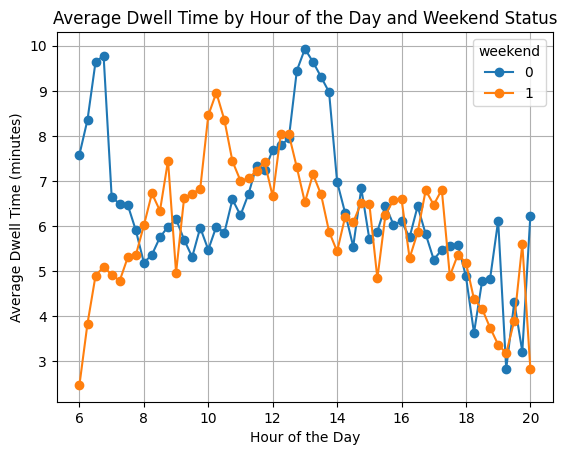

In [28]:
# Dwell Time by Hour of the Day (Weekdays vs. Weekends) :

# Path: performance.ipynb
# Create a linechart of dwell time by hour of the day and weekend status
hourly_avg = trip_data.groupby(['hour_of_day', 'weekend'])['dwell_time'].mean()
hourly_avg.unstack().plot(kind='line', marker='o')
plt.title('Average Dwell Time by Hour of the Day and Weekend Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Dwell Time (minutes)')
plt.grid()
plt.show()


# SITR

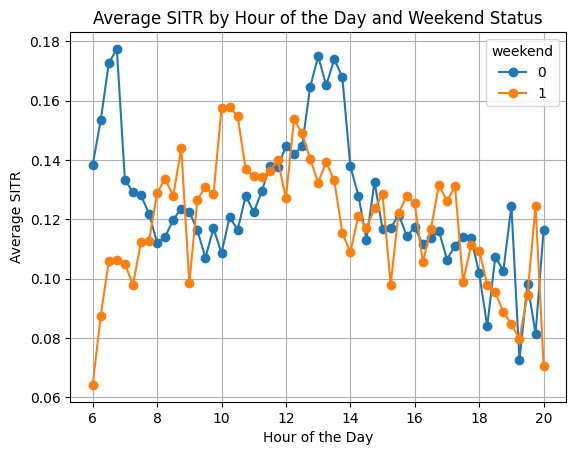

In [29]:
# SITR Time by Hour of the Day (Weekdays vs. Weekends) :

# Path: performance.ipynb
# Create a linechart of sitr time by hour of the day and weekend status
hourly_avg = trip_data.groupby(['hour_of_day', 'weekend'])['SITR'].mean()
hourly_avg.unstack().plot(kind='line', marker='o')
plt.title('Average SITR by Hour of the Day and Weekend Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average SITR')
plt.grid()
plt.show()


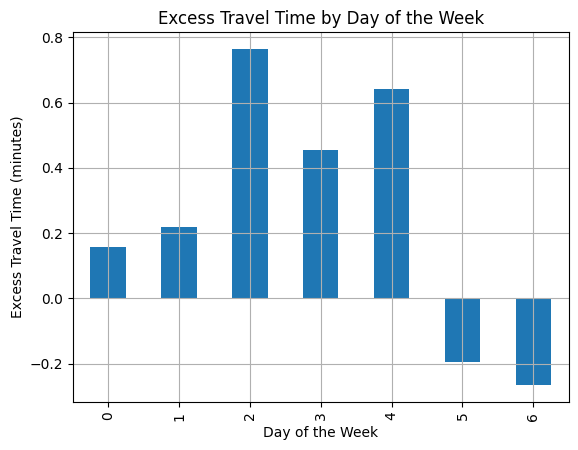

In [46]:
# Excess Travel Time by Day of the Week bar chart
# for average divide only with count not 0 excess travel time on the day
excess_travel_time_by_day = trip_data[trip_data['excess_travel_time']!=0].groupby('day_of_week')['excess_travel_time'].mean()
excess_travel_time_by_day.plot(kind='bar')
plt.title('Excess Travel Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Excess Travel Time (minutes)')
plt.grid()
plt.show()




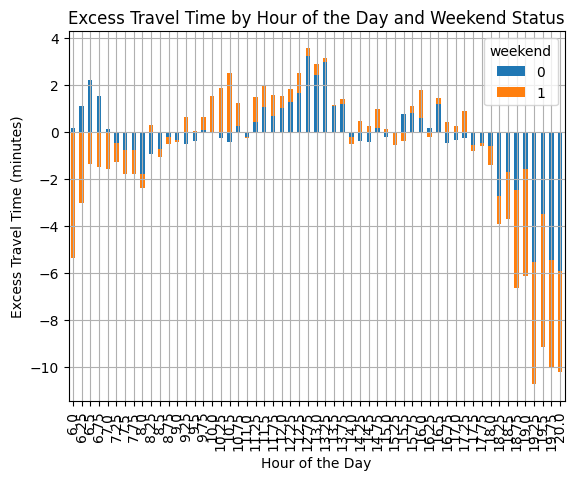

In [31]:
# xcess_travel_time by hour_of_day and weekend scatter bar chart
# Path: performance.ipynb
# Read in the data
# Create a scatter bar chart for excess travel time by hour of the day and weekend status
hourly_avg = trip_data.groupby(['hour_of_day', 'weekend'])['excess_travel_time'].mean()
hourly_avg.unstack().plot(kind='bar', stacked=True)
plt.title('Excess Travel Time by Hour of the Day and Weekend Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Excess Travel Time (minutes)')
plt.grid()
plt.show()



# bus behaviour

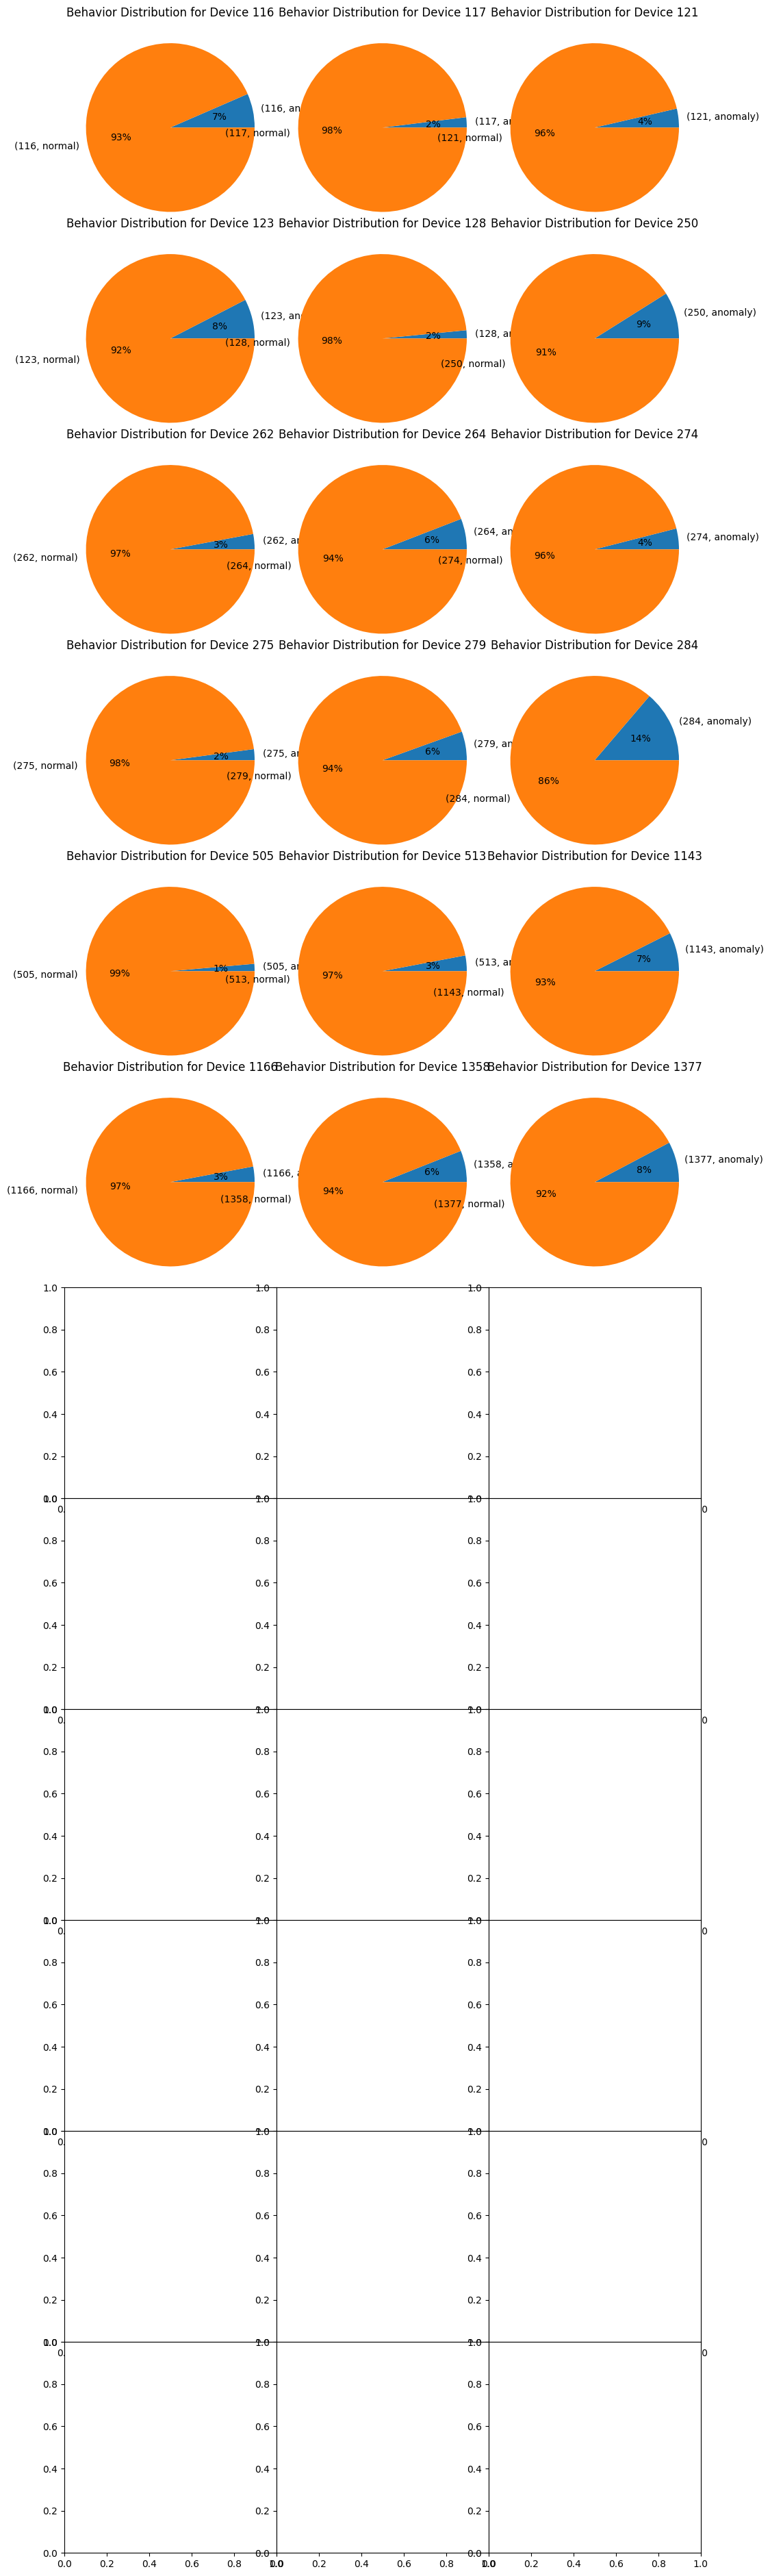

In [32]:
import matplotlib.pyplot as plt

# Group the data by device_id and behaviour, and count the number of occurrences
counts = trip_data.groupby(['device_id', 'behaviour']).size()

# Create a grid of subplots with 3 columns
num_cols = 3
num_rows = (len(counts) + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Plot each pie chart in a separate subplot
for i, (device_id, group) in enumerate(counts.groupby(level=0)):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    group.plot(kind='pie', autopct='%1.0f%%', ax=ax)
    ax.set_title(f'Behavior Distribution for Device {device_id}')
    ax.set_ylabel('')

# Remove the spacing between subplots and display the plot
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

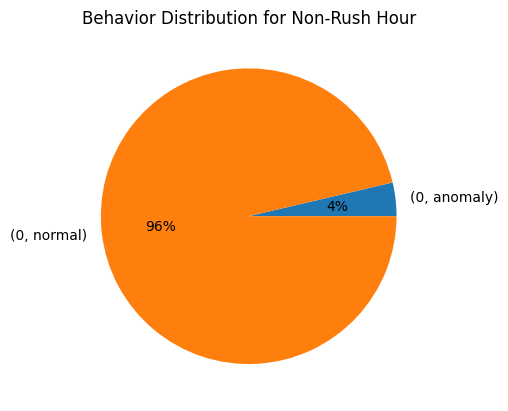

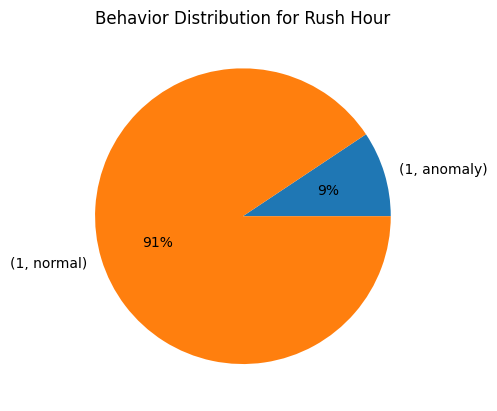

In [33]:
# Group the data by device_id and behaviour, and count the number of occurrences
counts = trip_data.groupby(['rush_hour', 'behaviour']).size()

dictinoary = {True: "Rush Hour", False: "Non-Rush Hour"}

# Create a pie chart for each device_id
for rush_hour, group in counts.groupby(level=0):
    group.plot(kind='pie', autopct='%1.0f%%')
    plt.title(f'Behavior Distribution for {dictinoary[rush_hour]}')
    plt.ylabel('')
    plt.show()

# SITR

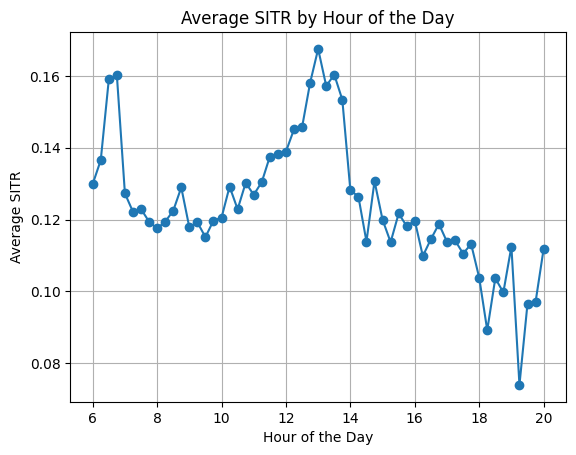

In [34]:
# plot the line chart of SITR vs hour_of_day
hourly_avg = trip_data.groupby(['hour_of_day'])['SITR'].mean()
hourly_avg.plot(kind='line', marker='o')
plt.title('Average SITR by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average SITR')
plt.grid()
plt.show()



# Cluster the busses

In [35]:
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,anomaly_score,behaviour,cluster
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,0.000000,Digana-Kandy,1,normal,2
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,2.030000,Kandy-Digana,1,normal,2
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,8.396667,Digana-Kandy,1,normal,2
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,2.180000,Kandy-Digana,1,normal,2
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,0.000000,Digana-Kandy,1,normal,2


In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'trip_data' contains your dataset

# Select relevant features for clustering
features = trip_data[['travel_time', 'dwell_time', 'excess_travel_time','SITR']]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (K)
k = 3

# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
trip_data['cluster'] = kmeans.fit_predict(scaled_features)

# The 'cluster' column in the 'trip_data' DataFrame now contains the cluster assignments


d:\Engineering\5th Semester\Project\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,anomaly_score,behaviour,cluster
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,0.000000,Digana-Kandy,1,normal,1
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,2.030000,Kandy-Digana,1,normal,1
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,8.396667,Digana-Kandy,1,normal,1
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,2.180000,Kandy-Digana,1,normal,0
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,0.000000,Digana-Kandy,1,normal,1


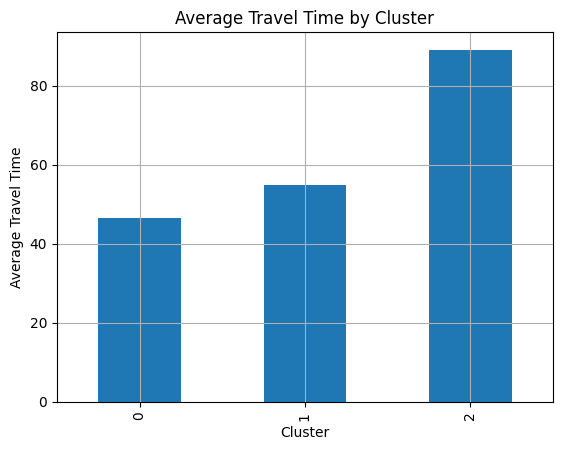

In [38]:
# plot cluster
trip_data.groupby('cluster')['travel_time'].mean().plot(kind='bar')
plt.title('Average Travel Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Travel Time')
plt.grid()
plt.show()



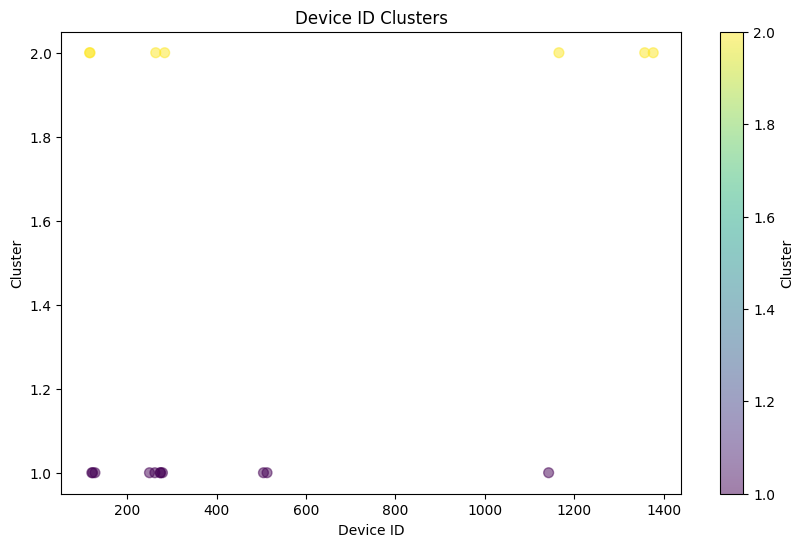

In [39]:
import matplotlib.pyplot as plt

# Group the data by device_id and get the cluster for each device
device_clusters = trip_data.groupby('device_id')['cluster'].max()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(device_clusters.index, device_clusters, c=device_clusters, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Device ID')
plt.ylabel('Cluster')
plt.title('Device ID Clusters')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_17320\1412848406.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['travel_time', 'dwell_time', 'excess_travel_time']] = numerical_features


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 11055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4, cost: 11073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13, cost: 10989.0
Run 3, iteration: 2/100, moves: 0, cost: 10989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 10873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4, cost: 10845.0
Best run was number 5


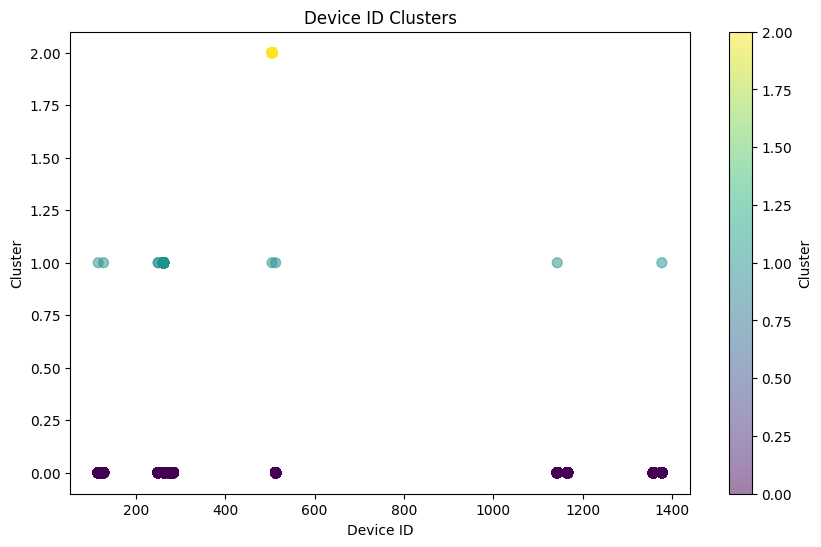

In [40]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'trip_data' contains your dataset

# Select the categorical feature (device_id) and other relevant features
features = trip_data[['device_id', 'travel_time', 'dwell_time', 'excess_travel_time']]

# Standardize the numerical features
numerical_features = features[['travel_time', 'dwell_time', 'excess_travel_time']]
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Combine the categorical and numerical features
features[['travel_time', 'dwell_time', 'excess_travel_time']] = numerical_features

# Choose the number of clusters (K)
k = 3

# Initialize and fit KModes model
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
trip_data['cluster'] = km.fit_predict(features)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(trip_data['device_id'], trip_data['cluster'], c=trip_data['cluster'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Device ID')
plt.ylabel('Cluster')
plt.title('Device ID Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [41]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'trip_data' contains your dataset

# Select relevant features for clustering
features = trip_data[['travel_time', 'dwell_time', 'excess_travel_time','anomaly_score']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize and fit DBSCAN model
dbscan = DBSCAN(eps=0.35, min_samples=5)  # You may need to adjust eps and min_samples
trip_data['cluster'] = dbscan.fit_predict(scaled_features)

# The 'cluster' column in the 'trip_data' DataFrame now contains the cluster assignments


In [42]:
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,anomaly_score,behaviour,cluster
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,0.000000,Digana-Kandy,1,normal,0
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,2.030000,Kandy-Digana,1,normal,0
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,8.396667,Digana-Kandy,1,normal,0
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,2.180000,Kandy-Digana,1,normal,0
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,0.000000,Digana-Kandy,1,normal,0


In [43]:
trip_data['cluster'].value_counts()

cluster
 0    3227
-1      89
 1      61
 4      11
 2       7
 5       7
 3       6
Name: count, dtype: int64

In [44]:
trip_data[trip_data['device_id']==116]['cluster'].value_counts()

cluster
 0    215
 1      8
-1      7
Name: count, dtype: int64